# Topic modelling via LDA (Latent Dirichlet allocation)
Topic modelling is a text mininig technique for discovery of general "topics" or themes in a collection of text documents [(Blei 2012)](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf).

* Each topic is a distribution over words
* Each document is a mixture of corpus-wide topics
* Each word is drawn from one of the topics

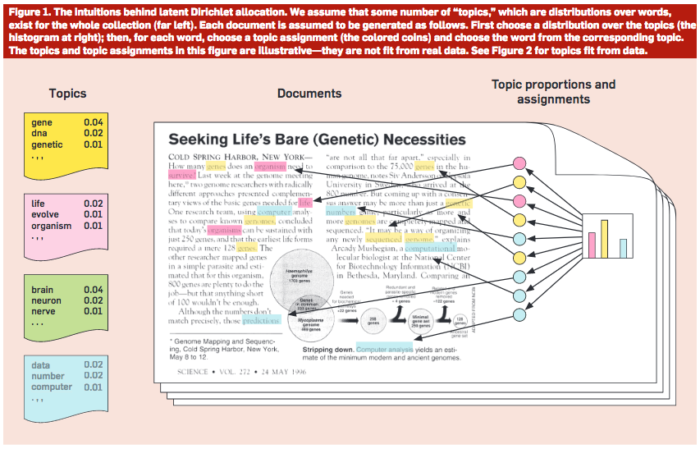

In [1]:
# Install and import libraries

# Data analysis and vis 
import pandas as pd
import numpy as np
import seaborn as sns

# Text preprocessing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Importing Gensim
#! pip install gensim # Uncomment if you need to install gensim
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary # Create a dictionary representation of the documents
from gensim.models import Phrases # Compute bigrams
from gensim.models import LdaModel # Train LDA model
from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Running LDA Model on Toy example

Let's first create a toy dataset 

In [2]:
# A conveninet sample of sentences about Covid vaccine from BBC, Google's Health Info
doc1 = "The threat of vaccine nationalism"
doc2 = "Vaccine nationalism means that poor countries will be left behind"
doc3 = "Is vaccine nationalism an obstacle or an obligation?"
doc4 = "World Health Organization said vaccine nationalism could prolong the pandemic"
doc5 = "Which vaccine is being used in UK?"
doc6 = "Who should not get Covid vaccine?"
doc7 = "How many injections do you need for the Oxford vaccine?"
doc8 = "Does vaccine stop you getting Covid?"
doc9 = "Who is eligible to get the COVID-19 vaccine"

In [3]:
docs = [doc1, doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9]
docs

['The threat of vaccine nationalism',
 'Vaccine nationalism means that poor countries will be left behind',
 'Is vaccine nationalism an obstacle or an obligation?',
 'World Health Organization said vaccine nationalism could prolong the pandemic',
 'Which vaccine is being used in UK?',
 'Who should not get Covid vaccine?',
 'How many injections do you need for the Oxford vaccine?',
 'Does vaccine stop you getting Covid?',
 'Who is eligible to get the COVID-19 vaccine']

### Text preprocessing

In [4]:
# Define a function for cleaning the documents via NLTK—remove stop words, punctuation, and normalise tokens 
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [5]:
# Clean the documents
clean_docs = [clean(doc).split() for doc in docs]

In [6]:
clean_docs

[['threat', 'vaccine', 'nationalism'],
 ['vaccine', 'nationalism', 'mean', 'poor', 'country', 'left', 'behind'],
 ['vaccine', 'nationalism', 'obstacle', 'obligation'],
 ['world',
  'health',
  'organization',
  'said',
  'vaccine',
  'nationalism',
  'could',
  'prolong',
  'pandemic'],
 ['vaccine', 'used', 'uk'],
 ['get', 'covid', 'vaccine'],
 ['many', 'injection', 'need', 'oxford', 'vaccine'],
 ['vaccine', 'stop', 'getting', 'covid'],
 ['eligible', 'get', 'covid19', 'vaccine']]

In [7]:
# Importing gensim and the LDA models
import gensim
from gensim import corpora, models

# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(clean_docs)

# Use the dictionary created above to convert the documents into document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_docs]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (2, 1), (8, 1), (9, 1)],
 [(0, 1),
  (2, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(2, 1), (17, 1), (18, 1)],
 [(2, 1), (19, 1), (20, 1)],
 [(2, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(2, 1), (19, 1), (25, 1), (26, 1)],
 [(2, 1), (20, 1), (27, 1), (28, 1)]]

### Running the LDA model

Parameters of the `models.ldamodel.LdaModel` function in `Gensim`
* `corpus` Document-terms matrix.

* `num_topics` The number of requested latent topics to be extracted from the training corpus.

* `id2word` Mapping from word IDs to words (via `gensim.corpora.dictionary.Dictionary`. It is used to determine the vocabulary size and topic printing.

In [8]:
# LDA model using gensim library

num_topics = 3
LDAModel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=50)

# Resulting topics—show the topic to terms distribution
print(LDAModel.print_topics(num_topics=num_topics, num_words=3))

[(0, '0.140*"vaccine" + 0.139*"covid" + 0.082*"get"'), (1, '0.035*"get" + 0.035*"uk" + 0.035*"used"'), (2, '0.164*"vaccine" + 0.097*"nationalism" + 0.030*"organization"')]


### Examining the LDA output

In [9]:
# Get the probability for each word in each topic
# Term-topic matrix learned during inference with the following shape: number of topics by vocabulary size

LDAModel.get_topics()

array([[0.01997101, 0.02003952, 0.14013724, 0.01994735, 0.01994734,
        0.01994734, 0.01994735, 0.01994735, 0.01999682, 0.01999682,
        0.01993374, 0.01993374, 0.01993374, 0.01993374, 0.01993374,
        0.01993374, 0.01993374, 0.02004325, 0.02004325, 0.13913414,
        0.08233266, 0.01997412, 0.01997413, 0.01997412, 0.01997413,
        0.07948084, 0.07948084, 0.02008707, 0.02008707],
       [0.03448316, 0.03466447, 0.03462823, 0.03442365, 0.03442365,
        0.03442365, 0.03442365, 0.03442365, 0.03455793, 0.03455794,
        0.0343845 , 0.0343845 , 0.0343845 , 0.0343845 , 0.0343845 ,
        0.0343845 , 0.0343845 , 0.0346802 , 0.03468019, 0.03436921,
        0.03471044, 0.0345001 , 0.0345001 , 0.0345001 , 0.0345001 ,
        0.03435641, 0.03435641, 0.03457253, 0.03457254],
       [0.09727865, 0.02980975, 0.16433801, 0.02989713, 0.02989713,
        0.02989713, 0.02989713, 0.02989713, 0.02984913, 0.02984913,
        0.02991082, 0.02991082, 0.02991082, 0.02991082, 0.02991082,
  

In [10]:
# Get the top terms in a topic

LDAModel.get_topic_terms(0)

[(2, 0.14013726),
 (19, 0.13913415),
 (20, 0.08233266),
 (26, 0.07948085),
 (25, 0.07948085),
 (27, 0.020087073),
 (28, 0.020087073),
 (18, 0.020043254),
 (17, 0.020043254),
 (1, 0.020039517)]

In [11]:
# See top 20 words in a topic
top_topics = LDAModel.top_topics(doc_term_matrix) 
top_topics

[([(0.16433801, 'vaccine'),
   (0.09727865, 'nationalism'),
   (0.02991082, 'could'),
   (0.02991082, 'world'),
   (0.02991082, 'said'),
   (0.02991082, 'pandemic'),
   (0.02991082, 'organization'),
   (0.02991082, 'health'),
   (0.02991082, 'prolong'),
   (0.029897133, 'country'),
   (0.029897133, 'left'),
   (0.029897133, 'mean'),
   (0.029897133, 'behind'),
   (0.029897133, 'poor'),
   (0.029870328, 'injection'),
   (0.029870328, 'need'),
   (0.029870326, 'many'),
   (0.029870326, 'oxford'),
   (0.029849129, 'obligation'),
   (0.029849125, 'obstacle')],
  -16.273347680001475),
 ([(0.034710445, 'get'),
   (0.034680195, 'uk'),
   (0.03468019, 'used'),
   (0.034664474, 'threat'),
   (0.03462823, 'vaccine'),
   (0.034572538, 'eligible'),
   (0.034572534, 'covid19'),
   (0.034557942, 'obstacle'),
   (0.034557935, 'obligation'),
   (0.034500103, 'oxford'),
   (0.034500103, 'injection'),
   (0.0345001, 'many'),
   (0.0345001, 'need'),
   (0.034483157, 'nationalism'),
   (0.03442365, 'left'

In [12]:
# Compute topic coherence and average topic coherence 
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -18.4853.
[([(0.16433801, 'vaccine'),
   (0.09727865, 'nationalism'),
   (0.02991082, 'could'),
   (0.02991082, 'world'),
   (0.02991082, 'said'),
   (0.02991082, 'pandemic'),
   (0.02991082, 'organization'),
   (0.02991082, 'health'),
   (0.02991082, 'prolong'),
   (0.029897133, 'country'),
   (0.029897133, 'left'),
   (0.029897133, 'mean'),
   (0.029897133, 'behind'),
   (0.029897133, 'poor'),
   (0.029870328, 'injection'),
   (0.029870328, 'need'),
   (0.029870326, 'many'),
   (0.029870326, 'oxford'),
   (0.029849129, 'obligation'),
   (0.029849125, 'obstacle')],
  -16.273347680001475),
 ([(0.034710445, 'get'),
   (0.034680195, 'uk'),
   (0.03468019, 'used'),
   (0.034664474, 'threat'),
   (0.03462823, 'vaccine'),
   (0.034572538, 'eligible'),
   (0.034572534, 'covid19'),
   (0.034557942, 'obstacle'),
   (0.034557935, 'obligation'),
   (0.034500103, 'oxford'),
   (0.034500103, 'injection'),
   (0.0345001, 'many'),
   (0.0345001, 'need'),
   (0.034483157, 'na

In [13]:
# Get the topic distribution for one document in your corpus, for example document 0 in your corpus
get_document_topics = LDAModel.get_document_topics(doc_term_matrix)
print(get_document_topics[0])

[(0, 0.08742603), (1, 0.084693044), (2, 0.8278809)]


In [14]:
# Get the topic distribution for all documents in your corpus
# Columns represent topics and rows represent documents
get_document_topics = [LDAModel.get_document_topics(item) for item in doc_term_matrix]
get_document_topics

[[(0, 0.08743583), (1, 0.084693186), (2, 0.82787097)],
 [(0, 0.04295487), (1, 0.042801015), (2, 0.9142441)],
 [(0, 0.06939223), (1, 0.06807646), (2, 0.8625313)],
 [(0, 0.034269042), (1, 0.03430127), (2, 0.93142974)],
 [(0, 0.08806523), (1, 0.08555777), (2, 0.826377)],
 [(0, 0.82372355), (1, 0.08401067), (2, 0.092265755)],
 [(0, 0.057779692), (1, 0.057233702), (2, 0.8849866)],
 [(0, 0.8622792), (1, 0.06728109), (2, 0.070439704)],
 [(0, 0.0861773), (1, 0.068632066), (2, 0.8451906)]]

In [15]:
get_document_topics = LDAModel.get_document_topics(doc_term_matrix)
print(get_document_topics[0])

[(0, 0.08743723), (1, 0.084693216), (2, 0.8278696)]


In [16]:
LDAModel.get_document_topics(doc_term_matrix)

## Running LDA model on Twitter data

We will use this dataset of [recent tweets about Pfizer and BioNTech vaccine on Kaggle](https://www.kaggle.com/gpreda/pfizer-vaccine-tweets).

The data is collected via the Twitter API using Python `tweepy` library. 

The data seem to be regularly updated, the current version contains tweets between 12 Dec 2020 and 21 Feb 2021.

We perform the LDA Model using [`gensim`](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py) 

In [17]:
VaccineTweets = pd.read_csv('kaggle_vaccination_tweets.csv')
VaccineTweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [18]:
# Number of dataset's rows and columns 
VaccineTweets.shape

(5898, 16)

In [19]:
VaccineTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5898 non-null   int64 
 1   user_name         5898 non-null   object
 2   user_location     4676 non-null   object
 3   user_description  5523 non-null   object
 4   user_created      5898 non-null   object
 5   user_followers    5898 non-null   int64 
 6   user_friends      5898 non-null   int64 
 7   user_favourites   5898 non-null   int64 
 8   user_verified     5898 non-null   bool  
 9   date              5898 non-null   object
 10  text              5898 non-null   object
 11  hashtags          4421 non-null   object
 12  source            5897 non-null   object
 13  retweets          5898 non-null   int64 
 14  favorites         5898 non-null   int64 
 15  is_retweet        5898 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 656.7+ KB


In [20]:
### Check tweets' text

# Set the maximum width of columns
pd.options.display.max_colwidth = 100

VaccineTweets.text.head(10)

0      Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccinat...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is create...
3    Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. ...
4    Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #...
5    Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastf...
6    it is a bit sad to claim the fame for success of #vaccination on patriotic competition between U...
7    There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris win...
8                     Covid vaccine; You getting it?\n\n #CovidVaccine #covid19 #PfizerBioNTech #Moderna
9    #CovidVaccine \n\nStates will start getting #COVID

### Text preprocessing

In [21]:
# Define a function for cleaning the documents via NLTK—remove stop words, punctuation, and normalise tokens 
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [22]:
# Remove stop words, punctuation, and normalise tokens using the clean function defined earlier
VaccineTweets = [clean(doc).split() for doc in VaccineTweets.text]
VaccineTweets

[['folk',
  'said',
  'daikon',
  'paste',
  'could',
  'treat',
  'cytokine',
  'storm',
  'pfizerbiontech',
  'httpstcoxehhimg1kf'],
 ['world',
  'wrong',
  'side',
  'history',
  'year',
  'hopefully',
  'biggest',
  'vaccination',
  'effort',
  'weve',
  'ev…',
  'httpstcodlchrzjkhm'],
 ['coronavirus',
  'sputnikv',
  'astrazeneca',
  'pfizerbiontech',
  'moderna',
  'covid19',
  'russian',
  'vaccine',
  'created',
  'last',
  '24',
  'years…',
  'httpstcoieylckbr8p'],
 ['fact',
  'immutable',
  'senator',
  'even',
  'ethically',
  'sturdy',
  'enough',
  'acknowledge',
  'them',
  '1',
  'born',
  'i…',
  'httpstcojqgv18kch4'],
 ['explain',
  'need',
  'vaccine',
  'borisjohnson',
  'matthancock',
  'whereareallthesickpeople',
  'pfizerbiontech…',
  'httpstcokxbsrobehq'],
 ['anyone',
  'useful',
  'adviceguidance',
  'whether',
  'covid',
  'vaccine',
  'safe',
  'whilst',
  'breastfeeding…',
  'httpstcoeifsyqoekn'],
 ['bit',
  'sad',
  'claim',
  'fame',
  'success',
  'vaccina

#### Add bigrams and trigrams

In [24]:
# Add bigrams and trigrams to VaccineTweets_clean if they appear 10 times or more
# Use the function Phrases() in Gensim which detects common phrases based on collocation counts
bigram = Phrases(VaccineTweets, min_count=20)
for idx in range(len(VaccineTweets)):
    for token in bigram[VaccineTweets[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            VaccineTweets[idx].append(token)

In [25]:
# View your corpus with added collocations
VaccineTweets

[['folk',
  'said',
  'daikon',
  'paste',
  'could',
  'treat',
  'cytokine',
  'storm',
  'pfizerbiontech',
  'httpstcoxehhimg1kf'],
 ['world',
  'wrong',
  'side',
  'history',
  'year',
  'hopefully',
  'biggest',
  'vaccination',
  'effort',
  'weve',
  'ev…',
  'httpstcodlchrzjkhm'],
 ['coronavirus',
  'sputnikv',
  'astrazeneca',
  'pfizerbiontech',
  'moderna',
  'covid19',
  'russian',
  'vaccine',
  'created',
  'last',
  '24',
  'years…',
  'httpstcoieylckbr8p'],
 ['fact',
  'immutable',
  'senator',
  'even',
  'ethically',
  'sturdy',
  'enough',
  'acknowledge',
  'them',
  '1',
  'born',
  'i…',
  'httpstcojqgv18kch4'],
 ['explain',
  'need',
  'vaccine',
  'borisjohnson',
  'matthancock',
  'whereareallthesickpeople',
  'pfizerbiontech…',
  'httpstcokxbsrobehq'],
 ['anyone',
  'useful',
  'adviceguidance',
  'whether',
  'covid',
  'vaccine',
  'safe',
  'whilst',
  'breastfeeding…',
  'httpstcoeifsyqoekn',
  'covid_vaccine'],
 ['bit',
  'sad',
  'claim',
  'fame',
  's

In [26]:
# Create a dictionary representation of the documents where each unique term is assigned an index.
VaccineTweets_dictionary = Dictionary(VaccineTweets)

In [27]:
# Filter out words that occur less than 10 tweets, or more than 50% of the tweets
VaccineTweets_dictionary.filter_extremes(no_below=5, no_above=0.5)

In [28]:
# Use the dictionary created above to convert the documents into document-term matrix
# This transforms the documents from text to vectors by computing the frequency of each word/bigram
# 'bow' stands for Bag-Of-Words document representation
VaccineTweets_corpus = [VaccineTweets_dictionary.doc2bow(doc) for doc in VaccineTweets]
VaccineTweets_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(21, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(21, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(8, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(22, 1), (46, 1), (47, 1), (48, 1), (49, 1)],
 [(15, 1), (18, 1), (21, 1), (34, 1), (35, 1), (50, 1), (51, 1), (52, 1)],
 [(50, 1),
  (51, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(21, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)],
 [(15, 1),
  (21, 1),
  (47, 1),
  (50, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(60, 1),
  (64, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1)]

Number of tokens and documents we will use to train the LDA model

In [29]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 29


NameError: name 'corpus' is not defined

### Training the LDA model

Parameters of the `models.ldamodel.LdaModel` function in `Gensim`
* `corpus` Document-terms matrix.

* `num_topics` The number of requested latent topics to be extracted from the training corpus.

* `id2word` Mapping from word IDs to words (via `gensim.corpora.dictionary.Dictionary`. It is used to determine the vocabulary size and topic printing.

* `chunksize` Number of documents to be used in each training chunk.

* `passes` Number of passes through the corpus during training.

* `iterations` Maximum number of iterations through the corpus when inferring the topic distribution of a corpus. 

In [30]:
# Set model parameters
num_topics = 15
chunksize = 200
passes = 20
iterations = 400

# Make a index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

LDAModel = LdaModel(
    corpus=VaccineTweets_corpus,
    id2word=VaccineTweets_dictionary,
    chunksize=chunksize,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

In [31]:
# Resulting topics—show the topic to terms distribution
print(LDAModel.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.108*"u" + 0.103*"need" + 0.077*"far" + 0.068*"supply" + 0.063*"receiving"'), (1, '0.080*"well" + 0.072*"news" + 0.064*"great" + 0.062*"good" + 0.051*"like"'), (2, '0.180*"vaccine" + 0.163*"pfizer" + 0.135*"covid19" + 0.047*"astrazeneca" + 0.045*"pfizervaccine"'), (3, '0.167*"first" + 0.088*"vaccine" + 0.065*"covid19" + 0.063*"first_dose" + 0.062*"death"'), (4, '0.179*"second" + 0.162*"day" + 0.092*"vaccine" + 0.082*"second_dose" + 0.049*"efficacy"'), (5, '0.116*"2nd" + 0.094*"shot" + 0.078*"thank" + 0.054*"covid19vaccine" + 0.047*"work"'), (6, '0.126*"dose" + 0.096*"vaccine" + 0.066*"today" + 0.061*"covid" + 0.059*"got"'), (7, '0.166*"vaccine" + 0.068*"done" + 0.058*"get" + 0.056*"effective" + 0.049*"israel"'), (8, '0.109*"people" + 0.063*"effect" + 0.060*"side" + 0.054*"side_effect" + 0.045*"health"'), (9, '0.128*"2" + 0.075*"💉" + 0.058*"time" + 0.043*"country" + 0.042*"many"'), (10, '0.141*"vaccination" + 0.099*"one" + 0.086*"jab" + 0.085*"week" + 0.063*"uk"'), (11, '0.073*"v

### Examining the LDA output

In [32]:
# Get the probability for each word in each topic
# Term-topic matrix learned during inference with the following shape: number of topics by vocabulary size

LDAModel.get_topics()

array([[6.3906824e-05, 6.3906809e-05, 6.3906809e-05, ..., 6.4428445e-05,
        6.4355008e-05, 6.3906802e-05],
       [3.7256126e-05, 3.7256112e-05, 3.7256112e-05, ..., 3.8208145e-05,
        3.7566904e-05, 3.7256101e-05],
       [1.6386653e-05, 1.6386652e-05, 1.6386657e-05, ..., 1.7921098e-05,
        1.6782524e-05, 1.7206476e-05],
       ...,
       [3.9691473e-05, 3.9691462e-05, 4.6636071e-02, ..., 3.9691455e-05,
        4.1289230e-05, 3.9691455e-05],
       [2.6376683e-05, 2.6376672e-05, 2.6376698e-05, ..., 2.6376672e-05,
        2.6376672e-05, 2.6376672e-05],
       [3.0987710e-05, 3.0987670e-05, 3.0987692e-05, ..., 3.1353244e-05,
        3.4771896e-05, 3.1353244e-05]], dtype=float32)

In [33]:
# Get the top terms in a topic
LDAModel.get_topic_terms(0)

[(60, 0.10795863),
 (31, 0.103082255),
 (170, 0.07704743),
 (1024, 0.068011306),
 (714, 0.06294418),
 (172, 0.04493809),
 (21, 0.036232054),
 (168, 0.033956848),
 (941, 0.030949391),
 (58, 0.03018601)]

#### How do we know if topics are of good quality? 

Topic coherence is a measure of topic model quality. Model coherence is optimal as the coherence score approaches 0.

In [34]:
# Compute Coherence Score using the u_mass approach, see http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf
coherence_LDAModel = CoherenceModel(model=LDAModel, corpus=VaccineTweets_corpus, dictionary=VaccineTweets_dictionary, coherence='u_mass')
coherence_LDAModel = coherence_LDAModel.get_coherence()
print('\nCoherence Score: ', coherence_LDAModel)


Coherence Score:  -12.185353288914278


In [35]:
# See top 20 words in a topic
# Calculate topic coherence for each topic
top_topics = LDAModel.top_topics(VaccineTweets_corpus) 
top_topics

[([(0.12625636, 'dose'),
   (0.096063204, 'vaccine'),
   (0.06576528, 'today'),
   (0.060827907, 'covid'),
   (0.05918636, 'got'),
   (0.046010878, 'first'),
   (0.04514328, 'covidvaccine'),
   (0.03899832, 'covid_vaccine'),
   (0.036808394, 'vaccinated'),
   (0.036617644, 'received'),
   (0.03187519, 'covid19'),
   (0.022458754, 'get'),
   (0.021933291, 'arm'),
   (0.021178097, '2nd_dose'),
   (0.01681728, 'grateful'),
   (0.01407052, 'borisjohnson'),
   (0.013469792, 'got_first'),
   (0.01311369, 'feel'),
   (0.012500258, '1st_dose'),
   (0.011645493, 'received_first')],
  -5.439910484016784),
 ([(0.14142947, 'vaccination'),
   (0.09860681, 'one'),
   (0.08633418, 'jab'),
   (0.08501728, 'week'),
   (0.063386545, 'uk'),
   (0.050643824, 'the…'),
   (0.036919758, 'covid'),
   (0.032686114, 'getting'),
   (0.027159126, 'covid19'),
   (0.025942491, 'it'),
   (0.023866864, 'staff'),
   (0.023478035, '12'),
   (0.02053929, 'everyone'),
   (0.018631, 'number'),
   (0.018337725, 'administer

In [36]:
# Compute average topic coherence in addition to topic coherence 
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -12.1854.
[([(0.12625636, 'dose'),
   (0.096063204, 'vaccine'),
   (0.06576528, 'today'),
   (0.060827907, 'covid'),
   (0.05918636, 'got'),
   (0.046010878, 'first'),
   (0.04514328, 'covidvaccine'),
   (0.03899832, 'covid_vaccine'),
   (0.036808394, 'vaccinated'),
   (0.036617644, 'received'),
   (0.03187519, 'covid19'),
   (0.022458754, 'get'),
   (0.021933291, 'arm'),
   (0.021178097, '2nd_dose'),
   (0.01681728, 'grateful'),
   (0.01407052, 'borisjohnson'),
   (0.013469792, 'got_first'),
   (0.01311369, 'feel'),
   (0.012500258, '1st_dose'),
   (0.011645493, 'received_first')],
  -5.439910484016784),
 ([(0.14142947, 'vaccination'),
   (0.09860681, 'one'),
   (0.08633418, 'jab'),
   (0.08501728, 'week'),
   (0.063386545, 'uk'),
   (0.050643824, 'the…'),
   (0.036919758, 'covid'),
   (0.032686114, 'getting'),
   (0.027159126, 'covid19'),
   (0.025942491, 'it'),
   (0.023866864, 'staff'),
   (0.023478035, '12'),
   (0.02053929, 'everyone'),
   (0.018631, 'num

In [37]:
# Run the LDA model for a range of values of num_topics

model_coherence = [] # Initialise a list

K = range(10,15) # 
for k in K: # a for loop iterating over values of num_topics ranging from 1 to 15  
    LDAModel = LdaModel(
    corpus=VaccineTweets_corpus,
    id2word=VaccineTweets_dictionary,
    chunksize=chunksize,
    iterations=400,
    num_topics=k,
    passes=passes)
    coherence_LDAModel = CoherenceModel(model=LDAModel, corpus=VaccineTweets_corpus, dictionary=VaccineTweets_dictionary, coherence='u_mass')
    model_coherence.append(coherence_LDAModel.get_coherence())

In [38]:
model_coherence

[-10.24980618911589,
 -10.617482772252567,
 -10.30327118901741,
 -10.584944401072233,
 -11.172945481796829]

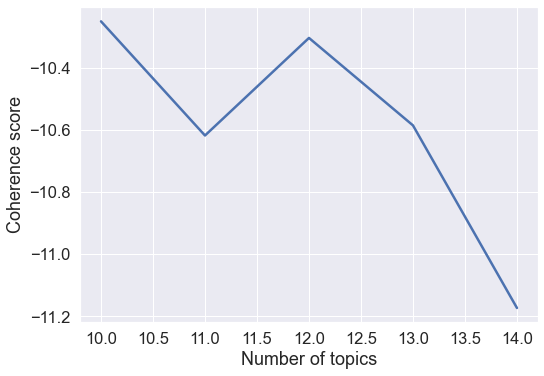

In [39]:
# Plot the coherence score against the number of topics

sns.set(rc={'figure.figsize':(8.2,5.8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Generate the plot
fig = sns.lineplot(x= K, y = model_coherence)    

# Add x and y labels
labels = fig.set(xlabel='Number of topics', ylabel='Coherence score')

#### What is the topic distribution for any one document in our corpus?  

In [40]:
# Get the topic distribution for one document in your corpus, for example document 0 in your corpus
get_document_topics = LDAModel.get_document_topics(VaccineTweets_corpus)
print(get_document_topics[0])

[(0, 0.017861096), (1, 0.26791075), (2, 0.017861096), (3, 0.017861096), (4, 0.017861096), (5, 0.017861096), (6, 0.017861096), (7, 0.017861096), (8, 0.017861096), (9, 0.017861096), (10, 0.017861096), (11, 0.017861096), (12, 0.5177561), (13, 0.017861096)]


In [41]:
# Get the topic distribution for all documents in your corpus
# Columns represent topics and rows represent documents
get_document_topics = [LDAModel.get_document_topics(item) for item in VaccineTweets_corpus]
get_document_topics

[[(0, 0.017861098),
  (1, 0.26791078),
  (2, 0.017861098),
  (3, 0.017861098),
  (4, 0.017861098),
  (5, 0.017861098),
  (6, 0.017861098),
  (7, 0.017861098),
  (8, 0.017861098),
  (9, 0.017861098),
  (10, 0.017861098),
  (11, 0.017861098),
  (12, 0.51775604),
  (13, 0.017861098)],
 [(2, 0.11904262),
  (5, 0.230165),
  (6, 0.11905877),
  (7, 0.1190481),
  (8, 0.11905777),
  (10, 0.23013763)],
 [(4, 0.7212956), (6, 0.20077915)],
 [(0, 0.010204318),
  (1, 0.1530612),
  (2, 0.010204318),
  (3, 0.724487),
  (4, 0.010204318),
  (5, 0.010204318),
  (6, 0.010204318),
  (7, 0.010204318),
  (8, 0.010204318),
  (9, 0.010204318),
  (10, 0.010204318),
  (11, 0.010204318),
  (12, 0.010204318),
  (13, 0.010204318)],
 [(0, 0.010204226),
  (1, 0.010204223),
  (2, 0.010204215),
  (3, 0.01020422),
  (4, 0.010204233),
  (5, 0.010204217),
  (6, 0.010204218),
  (7, 0.010204229),
  (8, 0.010204217),
  (9, 0.0102042155),
  (10, 0.010204213),
  (11, 0.010204215),
  (12, 0.010204228),
  (13, 0.86734515)],
 [(7

### Visualising the discovered topics via [pyLDAvis](http://bl.ocks.org/AlessandraSozzi/raw/ce1ace56e4aed6f2d614ae2243aab5a5/)
LDAvis is a web-based interactive visualisation of topics estimated using the LDA model

In [42]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=LDAModel, 
                              corpus=VaccineTweets_corpus, 
                              dictionary=VaccineTweets_dictionary)
# pyLDAvis.show(vis)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## Acknowledgements

1. [Converting Text to Features,](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#) in _Natural Language Processing Recipes_. Akshay Kulkarni & Adarsha Shivananda. 2019.
2. [Sklearn's module on feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html).
3. [Vector Semantics and Embeddings,](https://web.stanford.edu/~jurafsky/slp3/6.pdf) in _Speech and Language Processing_. Daniel Jurafsky & James H. Martin. Draft of December 30, 2020.
4. [K-Means Clustering with scikit-learn.](http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/)
5. [Pandas for Everyone.](https://www.pearson.com/us/higher-education/program/Chen-Pandas-for-Everyone-Python-Data-Analysis/PGM335102.html). Daniel Chen. 2018. 
6. [Text Analysis in Python for Social Scientists](https://www.cambridge.org/core/elements/text-analysis-in-python-for-social-scientists/BFAB0A3604C7E29F6198EA2F7941DFF3). Dirk Hovy. 2020.